# LSTM

In [1]:
import tensorflow as tf
import numpy as np
import io
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True, shuffle_files=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 67s 172ms/step - loss: 0.5480 - accuracy: 0.7178 - val_loss: 0.4721 - val_accuracy: 0.7852
Epoch 2/10
391/391 [==============================] - 60s 153ms/step - loss: 0.3766 - accuracy: 0.8447 - val_loss: 0.4408 - val_accuracy: 0.8048
Epoch 3/10
391/391 [==============================] - 62s 158ms/step - loss: 0.3375 - accuracy: 0.8621 - val_loss: 0.5588 - val_accuracy: 0.7070
Epoch 4/10
391/391 [==============================] - 62s 159ms/step - loss: 0.2646 - accuracy: 0.8979 - val_loss: 0.4232 - val_accuracy: 0.8213
Epoch 5/10
391/391 [==============================] - 64s 163ms/step - loss: 0.2016 - accuracy: 0.9258 - val_loss: 0.4533 - val_accuracy: 0.8414
Epoch 6/10
391/391 [==============================] - 64s 164ms/step - loss: 0.2474 - accuracy: 0.8993 - val_loss: 0.4801 - val_accuracy: 0.8010
Epoch 7/10
391/391 [==============================] - 65s 165ms/step - loss: 0.2930 - accuracy: 0.8779 - val_loss: 0.5577 - val_ac

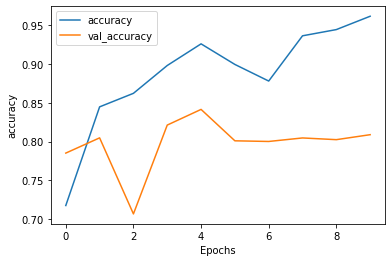

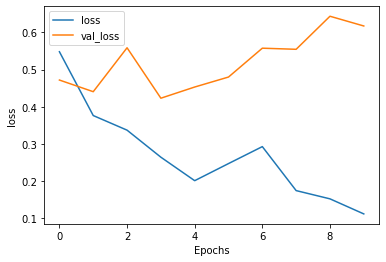

In [7]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", 'val_loss'])

if you want to stack LSTMs then you need to pass a param to the previous LSTM layers saying ` return_sequences=True`

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 123s 313ms/step - loss: 0.5202 - accuracy: 0.7412 - val_loss: 0.4242 - val_accuracy: 0.8191
Epoch 2/10
391/391 [==============================] - 120s 307ms/step - loss: 0.4379 - accuracy: 0.7808 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
391/391 [==============================] - 123s 315ms/step - loss: 0.6413 - accuracy: 0.6322 - val_loss: 0.6667 - val_accuracy: 0.6020
Epoch 4/10
391/391 [==============================] - 124s 317ms/step - loss: 0.5622 - accuracy: 0.6984 - val_loss: 0.6328 - val_accuracy: 0.6692
Epoch 5/10
391/391 [==============================] - 124s 317ms/step - loss: 0.4152 - accuracy: 0.8189 - val_loss: 0.6653 - val_accuracy: 0.7108
Epoch 6/10
391/391 [==============================] - 121s 309ms/step - loss: 0.2979 - accuracy: 0.8785 - val_loss: 0.4178 - val_accuracy: 0.8212
Epoch 7/10
391/391 [==============================] - 121s 309ms/step - loss: 0.2503 - accuracy: 0.9016 - val_loss: 0.5074 -

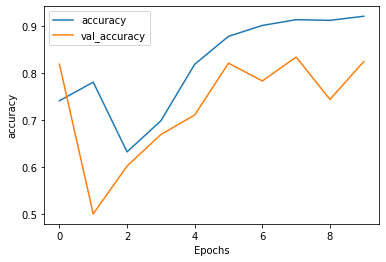

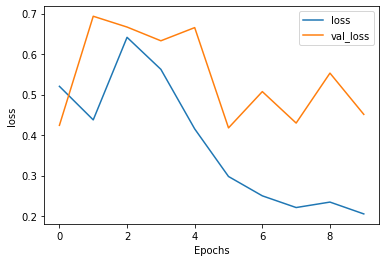

In [10]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", 'val_loss'])

the smoother the training lines, the better the training. (It means the weights are improving better)
It does appear that the LSTM tends to overfit so you need to adjust your hyperparameters accordingly. 

# Convolutional NN in NLP

# 

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation="relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 46s 117ms/step - loss: 0.4446 - accuracy: 0.7814 - val_loss: 0.3098 - val_accuracy: 0.8760
Epoch 2/10
391/391 [==============================] - 24s 61ms/step - loss: 0.2203 - accuracy: 0.9185 - val_loss: 0.3135 - val_accuracy: 0.8751
Epoch 3/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1691 - accuracy: 0.9400 - val_loss: 0.3506 - val_accuracy: 0.8658
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1379 - accuracy: 0.9510 - val_loss: 0.3725 - val_accuracy: 0.8690
Epoch 5/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1108 - accuracy: 0.9616 - val_loss: 0.4307 - val_accuracy: 0.8619
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 0.0897 - accuracy: 0.9696 - val_loss: 0.5001 - val_accuracy: 0.8623
Epoch 7/10
391/391 [==============================] - 19s 48ms/step - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.5415 - val_accuracy

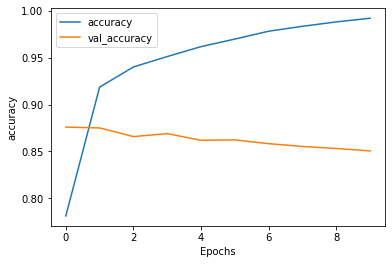

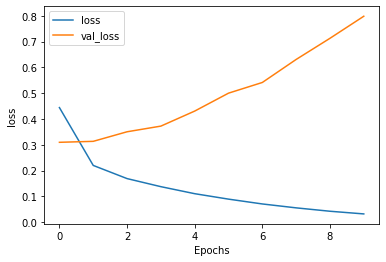

In [8]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", 'val_accuracy'])

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", 'val_loss'])